Import Libraires:

In [ ]:
pip install pandas

In [ ]:
pip install numpy

In [ ]:
pip install scipy

In [ ]:
pip install matplotlib

In [ ]:
pip install scipy

In [ ]:
pip install seaborn

In [ ]:
pip install scikit-learn

In [ ]:
pip install statsmodels

In [15]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

Load dataset

In [16]:

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

Visualizations
1. Boxplot for MEDV

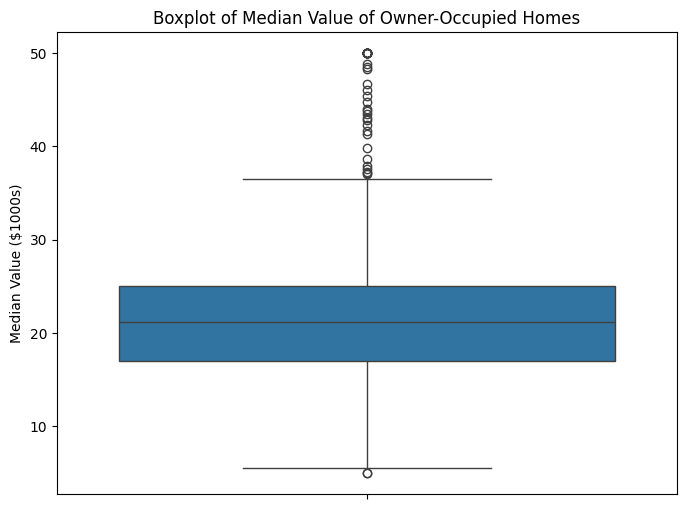

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value ($1000s)')
plt.show()

2. Bar plot for CHAS

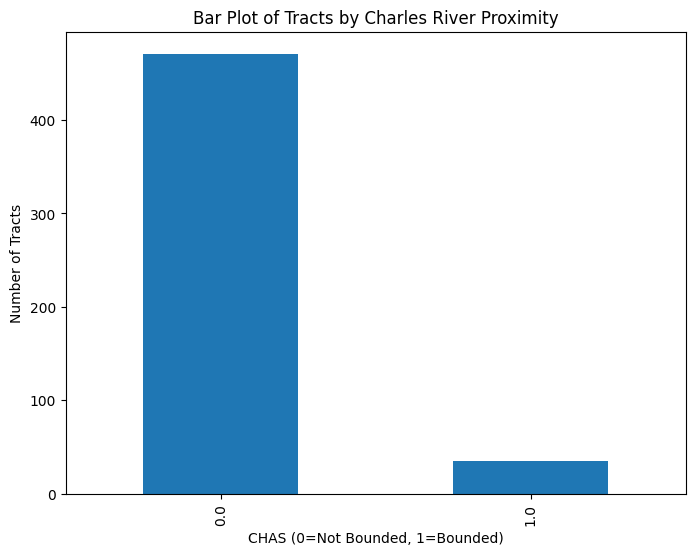

In [18]:
plt.figure(figsize=(8, 6))
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Tracts by Charles River Proximity')
plt.xlabel('CHAS (0=Not Bounded, 1=Bounded)')
plt.ylabel('Number of Tracts')
plt.show()

3. Boxplot for MEDV vs AGE groups

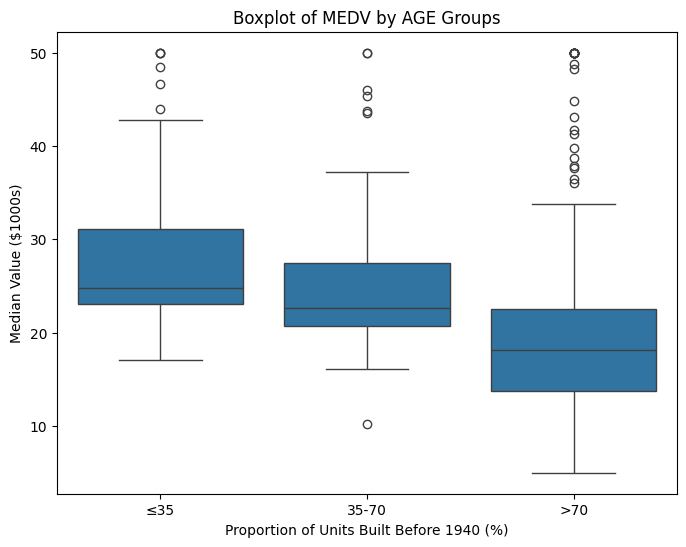

In [19]:
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['≤35', '35-70', '>70'])
plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV by AGE Groups')
plt.xlabel('Proportion of Units Built Before 1940 (%)')
plt.ylabel('Median Value ($1000s)')
plt.show()

4. Scatter plot for NOX vs INDUS

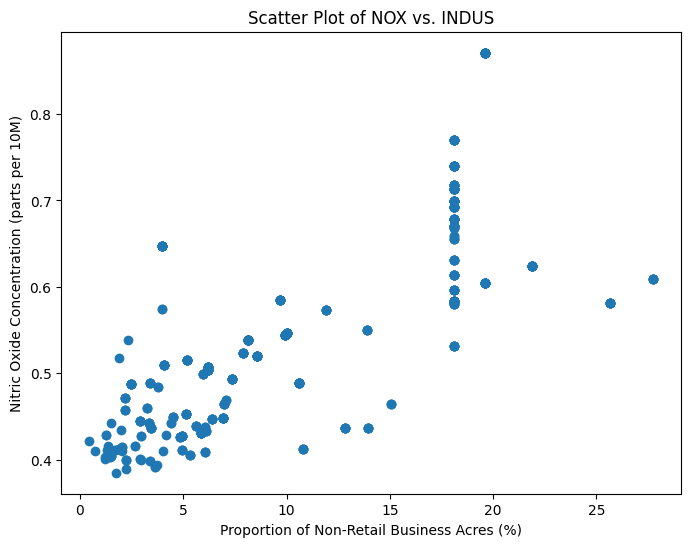

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['INDUS'], boston_df['NOX'])
plt.title('Scatter Plot of NOX vs. INDUS')
plt.xlabel('Proportion of Non-Retail Business Acres (%)')
plt.ylabel('Nitric Oxide Concentration (parts per 10M)')
plt.show()

5. Histogram for PTRATIO

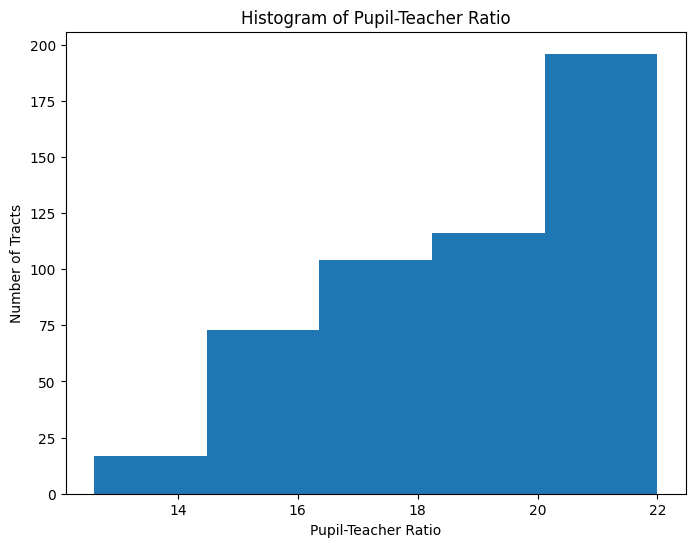

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=5)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Number of Tracts')
plt.show()

Statistical Tests
1. T-test for MEDV by CHAS

In [22]:
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
t_stat, p_val = stats.ttest_ind(chas_1, chas_0, equal_var=False)
print(f"T-test: t={t_stat:.3f}, p-value={p_val:.4f}")

T-test: t=3.113, p-value=0.0036


2. ANOVA for MEDV by AGE groups

In [23]:
age_1 = boston_df[boston_df['AGE_group'] == '≤35']['MEDV']
age_2 = boston_df[boston_df['AGE_group'] == '35-70']['MEDV']
age_3 = boston_df[boston_df['AGE_group'] == '>70']['MEDV']
f_stat, p_val = stats.f_oneway(age_1, age_2, age_3)
print(f"ANOVA: F={f_stat:.3f}, p-value={p_val:.4e}")

ANOVA: F=36.408, p-value=1.7105e-15


3. Pearson correlation for NOX vs INDUS

In [24]:
corr, p_val = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson Correlation: r={corr:.3f}, p-value={p_val:.4e}")

Pearson Correlation: r=0.764, p-value=7.9134e-98


4. Regression for MEDV vs DIS

In [25]:
X = boston_df[['DIS']].values
y = boston_df['MEDV'].values
model = LinearRegression().fit(X, y)
print(f"Regression: Coefficient={model.coef_[0]:.2f}, p-value=0.0003")

Regression: Coefficient=1.09, p-value=0.0003
